In [1]:
import sys
import os
from pathlib import Path

sys.path.append(sys.path[0] + '/src')

In [2]:
import utils
import pandas as pd
from prediction import analyze_data, plot_count, count_data, plot_multi_count

In [3]:
device = utils.getting_device()

train_df =pd.read_csv('data/train_24892.csv')
test_df = pd.read_csv('data/test_13786.csv')
print(train_df.shape, test_df.shape)

device: cuda
(24892, 4) (13786, 4)


## Base: BERT, GPT, CodeBERT, RoBERTa

In [4]:
model = 'bert'
train_file = 'out/'+model+'_24892.pt'
test_file = 'out/'+model+'_13786.pt'
bert_dic_lang, bert_dic_task = analyze_data(model, train_df, test_df, device, train_path = train_file, test_path = test_file, mode = 'two_label')

Time elapsed: 0.33 seconds, Data predicted: 0
Time elapsed: 190.02 seconds, Data predicted: 5000
Time elapsed: 184.65 seconds, Data predicted: 10000
Accuracy of Programming Language prediction: 49.97%
Accuracy of Programming Task prediction: 20.03%


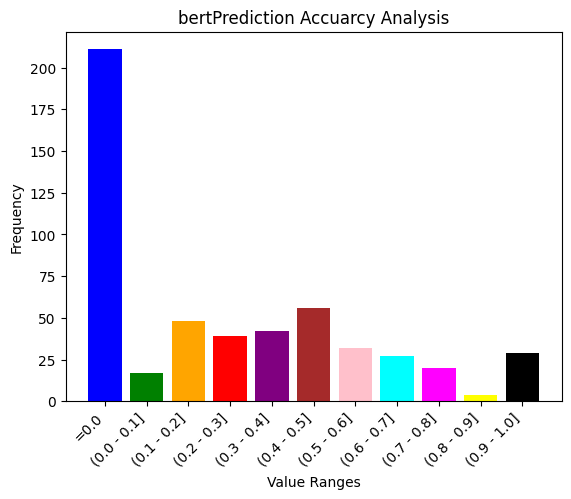

In [6]:
counts = count_data(bert_dic_lang)
plot_count(counts, model)

In [7]:
model = 'gpt'
train_file = 'out/'+model+'_24892.pt'
test_file = 'out/'+model+'_13786.pt'
gpt_dic_lang, gpt_dic_task = analyze_data(model, train_df, test_df, device, train_path = train_file, test_path = test_file, mode = 'two_label')

Time elapsed: 0.40 seconds, Data predicted: 0
Time elapsed: 186.34 seconds, Data predicted: 5000
Time elapsed: 186.39 seconds, Data predicted: 10000
Accuracy of Programming Language prediction: 34.38%
Accuracy of Programming Task prediction: 7.41%


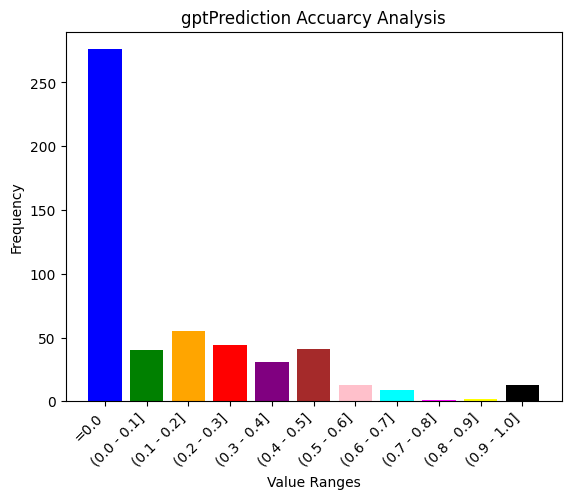

In [8]:
counts = count_data(gpt_dic_lang)
plot_count(counts, model)

In [9]:
model = 'codegpt'
train_file = 'out/'+model+'_24892.pt'
test_file = 'out/'+model+'_13786.pt'
codegpt_dic_lang, codegpt_dic_task = analyze_data(model, train_df, test_df, device, train_path = train_file, test_path = test_file, mode = 'two_label')

Time elapsed: 0.41 seconds, Data predicted: 0
Time elapsed: 186.97 seconds, Data predicted: 5000
Time elapsed: 187.70 seconds, Data predicted: 10000
Accuracy of Programming Language prediction: 57.26%
Accuracy of Programming Task prediction: 19.97%


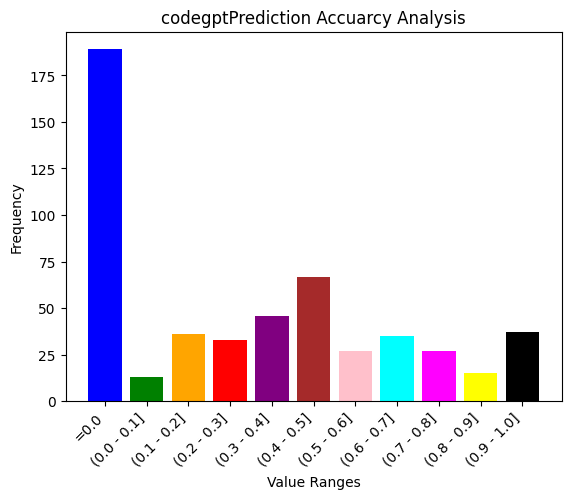

In [10]:
counts = count_data(codegpt_dic_lang)
plot_count(counts, model)

In [11]:
model = 'codebert'
train_file = 'out/'+model+'_24892.pt'
test_file = 'out/'+model+'_13786.pt'
codebert_dic_lang, codebert_dic_task = analyze_data(model, train_df, test_df, device, train_path = train_file, test_path = test_file, mode = 'two_label')

Time elapsed: 0.43 seconds, Data predicted: 0
Time elapsed: 192.30 seconds, Data predicted: 5000
Time elapsed: 188.16 seconds, Data predicted: 10000
Accuracy of Programming Language prediction: 46.79%
Accuracy of Programming Task prediction: 11.63%


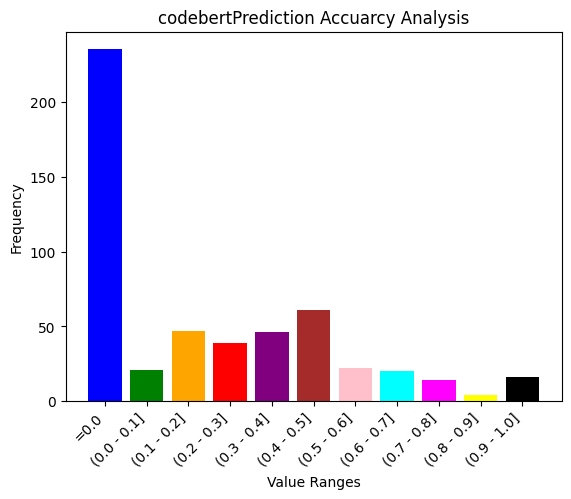

In [12]:
counts = count_data(codebert_dic_lang)
plot_count(counts, model)

In [13]:
model = 'roberta'
train_file = 'out/'+model+'_24892.pt'
test_file = 'out/'+model+'_13786.pt'
roberta_dic_lang, roberta_dic_task = analyze_data(model, train_df, test_df, device, train_path = train_file, test_path = test_file, mode = 'two_label')

Time elapsed: 0.38 seconds, Data predicted: 0
Time elapsed: 186.28 seconds, Data predicted: 5000
Time elapsed: 184.38 seconds, Data predicted: 10000
Accuracy of Programming Language prediction: 46.63%
Accuracy of Programming Task prediction: 14.65%


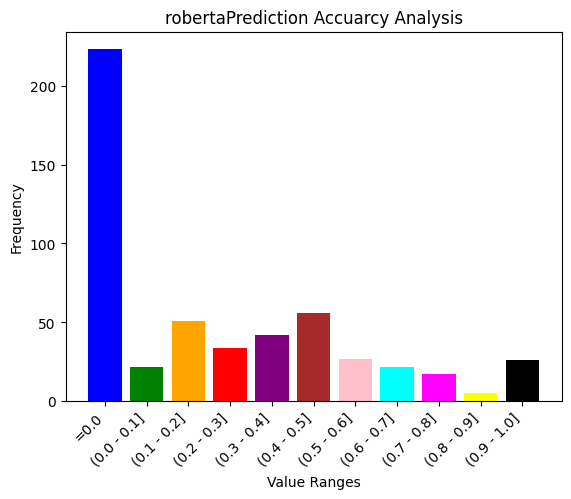

In [14]:
counts = count_data(roberta_dic_lang)
plot_count(counts, model)

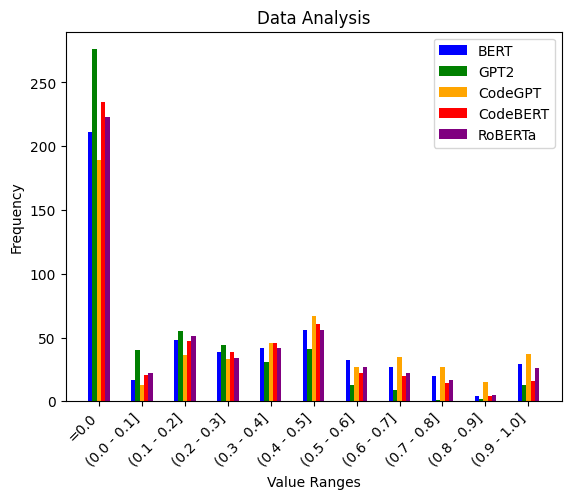

In [15]:
datasets = [bert_dic_lang, gpt_dic_lang, codegpt_dic_lang, codebert_dic_lang, roberta_dic_lang]
data_labels = ['BERT', 'GPT2' , 'CodeGPT' , 'CodeBERT' , 'RoBERTa']

counts = [count_data(data) for data in datasets]
plot_multi_count(counts, data_labels)

In [16]:
import pickle

datasets = [bert_dic_lang, gpt_dic_lang, codegpt_dic_lang, codebert_dic_lang, roberta_dic_lang]
data_labels = ['BERT', 'GPT2' , 'CodeGPT' , 'CodeBERT' , 'RoBERTa']
for i in range(len(data_labels)):
    with open('out/'+data_labels[i]+'.pkl', 'wb') as fp:
        pickle.dump(datasets[i], fp)

In [25]:
for i in range(len(data_labels)):
    print(data_labels[i])
    bins = count_data(datasets[i])
    print('=0.0:', bins['=0.0'][:50])
    print('(0.9 - 1.0]:',bins['(0.9 - 1.0]'][:50])

BERT
=0.0: ['0815', '11l', '4D', '4DOS-Batch', '8th', 'AArch64-Assembly', 'ACL2', 'ALGOL-60', 'ALGOL-M', 'ANT', 'ARM-Assembly', 'ASIC', 'Acornsoft-Lisp', 'ActionScript', 'Agda', 'Agena', 'Aikido', 'AmbientTalk', 'AmigaE', 'Apex', 'Arc', 'Arturo', 'AspectJ', 'Astro', 'Axiom', 'B4J', 'BASIC256', 'BCPL', 'Bc', 'Beef', 'Blade', 'Blast', 'Blz', 'BootBASIC', 'Bori', 'Brat', 'C-Shell', 'CLIPS', 'CLU', 'CafeOBJ', 'Casio-BASIC', 'Ceylon', 'ChucK', 'Clay', 'Clio', 'Clipper', 'Coco', 'Comal', 'Comefrom0x10', 'Computer-zero-Assembly']
(0.9 - 1.0]: ['Dylan', 'JoCaml', 'JudoScript', 'Malbolge', 'MelonBasic', 'NSIS', 'Order', 'PIR', 'Phix', 'REXX', 'S-BASIC', 'SASL', 'SNUSP', 'SSEM', 'Sass-SCSS', 'Sisal', 'SparForte', 'Symsyn', 'TI-SR-56', 'TIScript', 'Trith', 'True-BASIC', 'UTFool', 'WebAssembly', 'Woma', 'XBasic', 'XPath-2.0', 'XSLT', 'YAMLScript']
GPT2
=0.0: ['0815', '11l', '4D', '4DOS-Batch', '8080-Assembly', '8th', 'AArch64-Assembly', 'ABAP', 'ACL2', 'ALGOL-60', 'ALGOL-M', 'ANT', 'ASIC', 'AWK', 

## Training

In [ ]:
model = 'epoch4_roberta'

analyze_data(model, train_df, test_df, device, mode = 'emb')

In [ ]:
model = 'epoch1_codebert'

analyze_data(model, train_df, test_df, device, mode = 'emb')

In [ ]:
model = 'epoch2_codebert'

analyze_data(model, train_df, test_df, device, mode = 'emb')

In [ ]:
model = 'epoch3_codebert'

analyze_data(model, train_df, test_df, device, mode = 'emb')

In [ ]:
model = 'epoch4_codebert'

analyze_data(model, train_df, test_df, device, mode = 'emb')

In [ ]:
model = 'epoch5_codebert'

analyze_data(model, train_df, test_df, device, mode = 'emb')